In [97]:
import pandas as pd
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [98]:
data_pnj = pd.read_csv('PNJ.csv')

In [99]:
data_pnj['Date/Time'] = pd.to_datetime(data_pnj['Date/Time']).dt.date

In [100]:
df = data_pnj.drop_duplicates(subset=["Date/Time"], keep='first')

In [102]:
df.reset_index(inplace = True, drop = True)
df.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,PNJ,2018-02-28,78.14,78.99,78.14,78.99,270,0
1,PNJ,2018-03-01,78.14,78.14,78.14,78.14,349,0
2,PNJ,2018-03-02,77.14,77.19,77.14,77.19,745,0
3,PNJ,2018-03-05,77.14,77.14,77.14,77.14,619,0
4,PNJ,2018-03-06,78.61,80.76,78.61,80.76,206,0


Đồ thị Open và Close

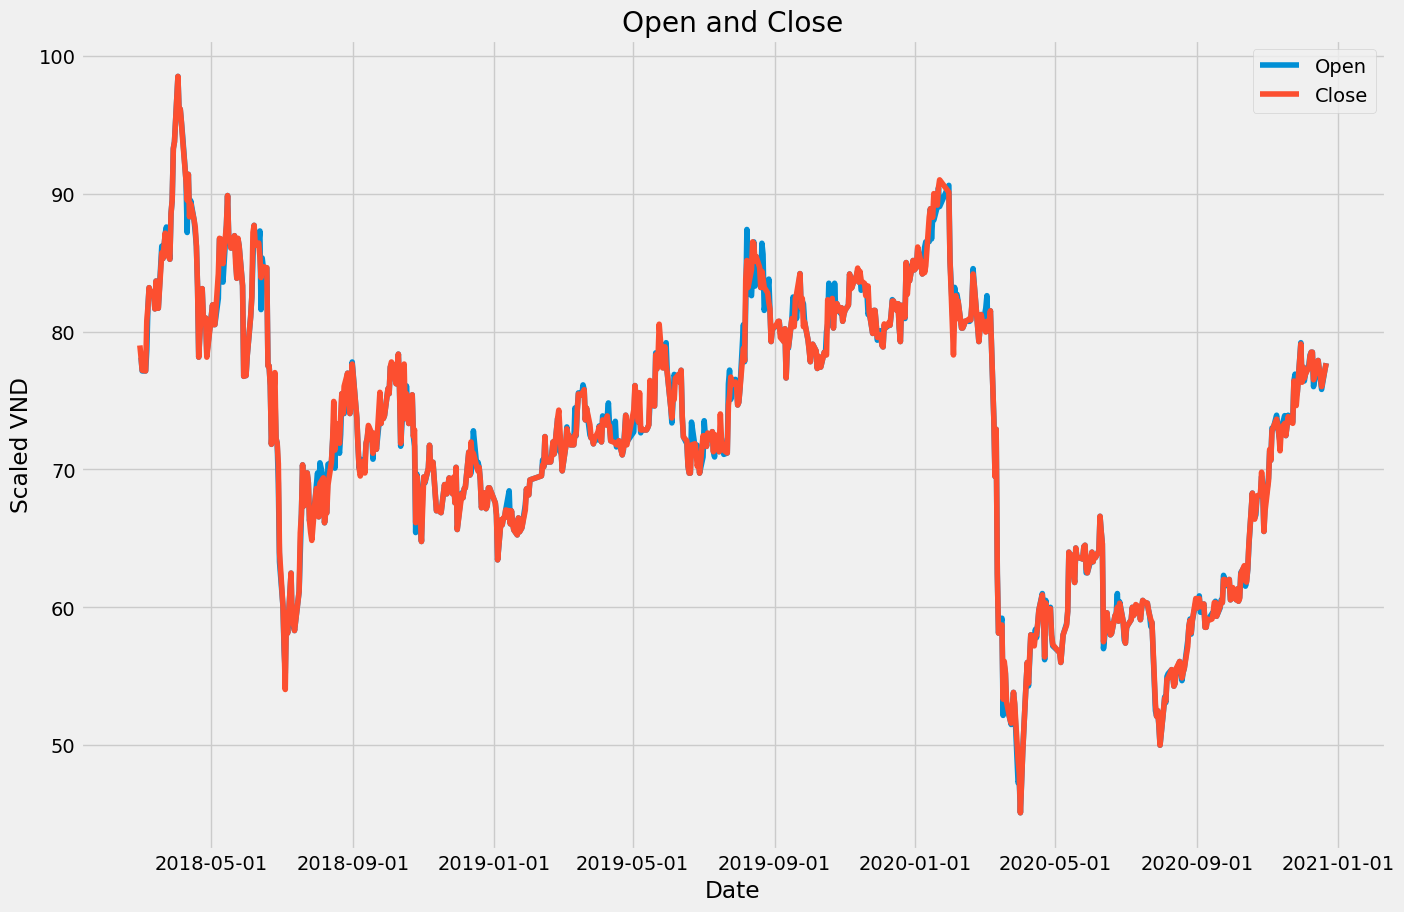

In [130]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.plot(df['Open'], label='Open')
ax.plot(df['Close'], label="Close")
ax.set_xlabel('Date')
ax.set_ylabel('Scaled VND')
ax.set_title('Open and Close')
plt.legend()
plt.show()

Đồ thị High và Low

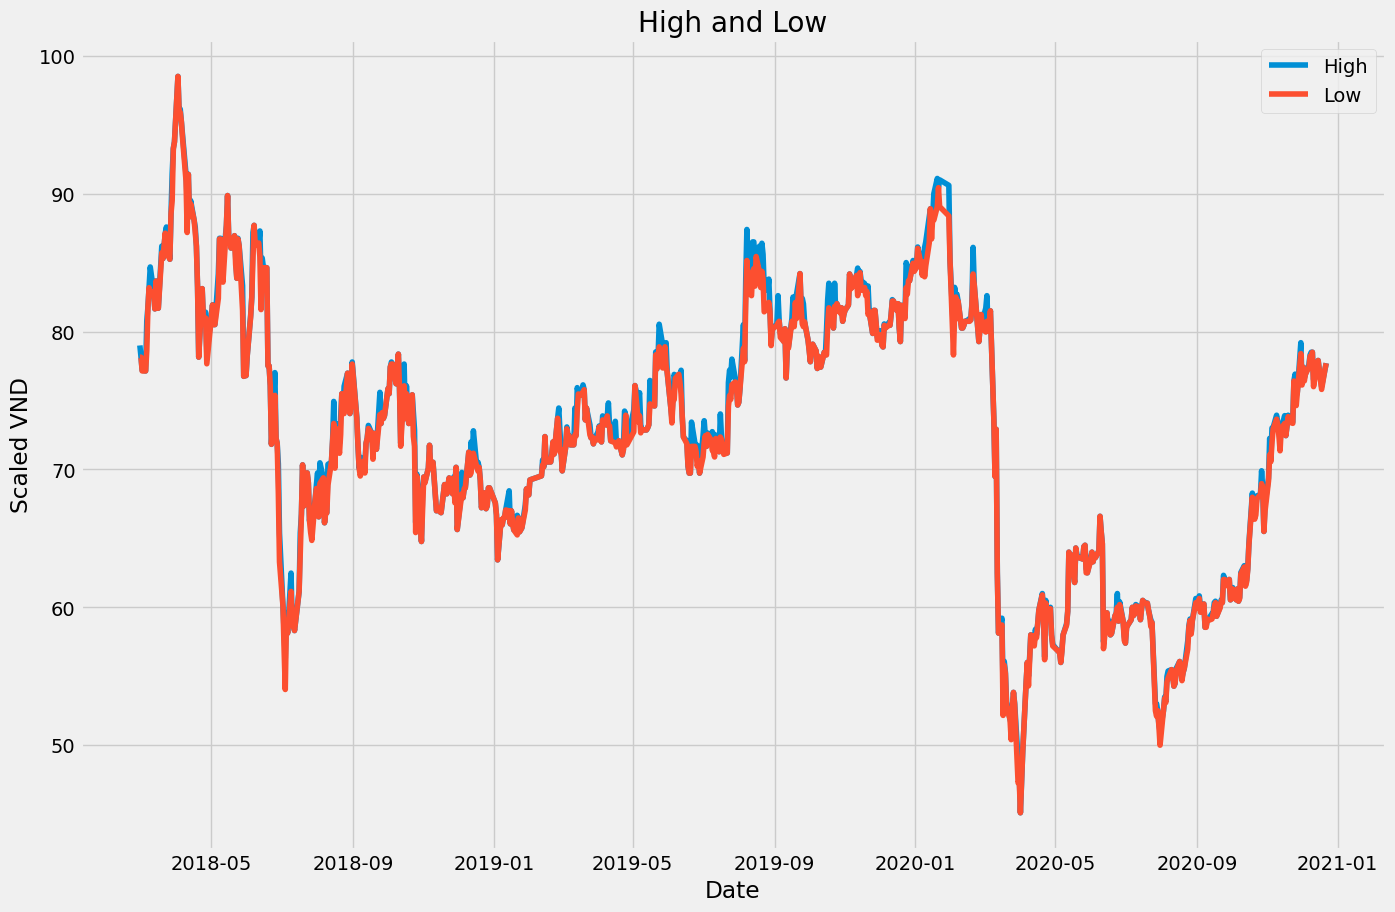

In [131]:
fig,ax = plt.subplots(figsize=(15,10))
ax.plot(df['High'], label='High')
ax.plot(df['Low'], label="Low")
ax.set_xlabel('Date')
ax.set_ylabel('Scaled VND')
ax.set_title('High and Low')
plt.legend()
plt.show()

In [105]:
data = df.filter(['Close'])

In [106]:
dataset = data.values
training_data_len = math.ceil(len(dataset)* .8)
training_data_len

568

In [115]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.63464419],
       [0.61872659],
       [0.60093633],
       [0.6       ],
       [0.66779026],
       [0.68689139],
       [0.71310861],
       [0.70730337],
       [0.70730337],
       [0.68426966],
       [0.72209738],
       [0.68520599],
       [0.68520599],
       [0.76048689],
       [0.75262172],
       [0.76947566],
       [0.78707865],
       [0.76048689],
       [0.75168539],
       [0.81385768],
       [0.83146067],
       [0.90149813],
       [0.91123596],
       [1.        ],
       [0.95205993],
       [0.95561798],
       [0.93801498],
       [0.91573034],
       [0.85805243],
       [0.83183521],
       [0.8670412 ],
       [0.8093633 ],
       [0.82715356],
       [0.80486891],
       [0.79513109],
       [0.76947566],
       [0.71385768],
       [0.61872659],
       [0.71179775],
       [0.67191011],
       [0.67191011],
       [0.61872659],
       [0.68970037],
       [0.66292135],
       [0.66292135],
       [0.73202247],
       [0.78014981],
       [0.779

In [160]:
train_data = scaled_data[0:training_data_len ,:]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i, 0])
    if i<=61:
     print(x_train)
     print(y_train)
     print()
    

[array([0.63464419, 0.61872659, 0.60093633, 0.6       , 0.66779026,
       0.68689139, 0.71310861, 0.70730337, 0.70730337, 0.68426966,
       0.72209738, 0.68520599, 0.68520599, 0.76048689, 0.75262172,
       0.76947566, 0.78707865, 0.76048689, 0.75168539, 0.81385768,
       0.83146067, 0.90149813, 0.91123596, 1.        , 0.95205993,
       0.95561798, 0.93801498, 0.91573034, 0.85805243, 0.83183521,
       0.8670412 , 0.8093633 , 0.82715356, 0.80486891, 0.79513109,
       0.76947566, 0.71385768, 0.61872659, 0.71179775, 0.67191011,
       0.67191011, 0.61872659, 0.68970037, 0.66292135, 0.66292135,
       0.73202247, 0.78014981, 0.77921348, 0.77303371, 0.74569288,
       0.79775281, 0.83820225, 0.78089888, 0.78014981, 0.76685393,
       0.78370787, 0.74550562, 0.7258427 , 0.78014981, 0.77003745])]
[0.7157303370786515]

[array([0.63464419, 0.61872659, 0.60093633, 0.6       , 0.66779026,
       0.68689139, 0.71310861, 0.70730337, 0.70730337, 0.68426966,
       0.72209738, 0.68520599, 0.685

In [161]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [162]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(508, 60, 1)

In [163]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [164]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [165]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

508/508 [==============================] - 17s 25ms/step - loss: 0.0091


In [166]:
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [167]:
x_test = np.array(x_test)

In [168]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [169]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


5/5 [==============================] - 1s 16ms/step


In [170]:
rmse = np.sqrt( np.mean( predictions - y_test)**2)
rmse 

1.1775768014894312

C:\Users\Asus\AppData\Local\Temp\ipykernel_1540\3121739023.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


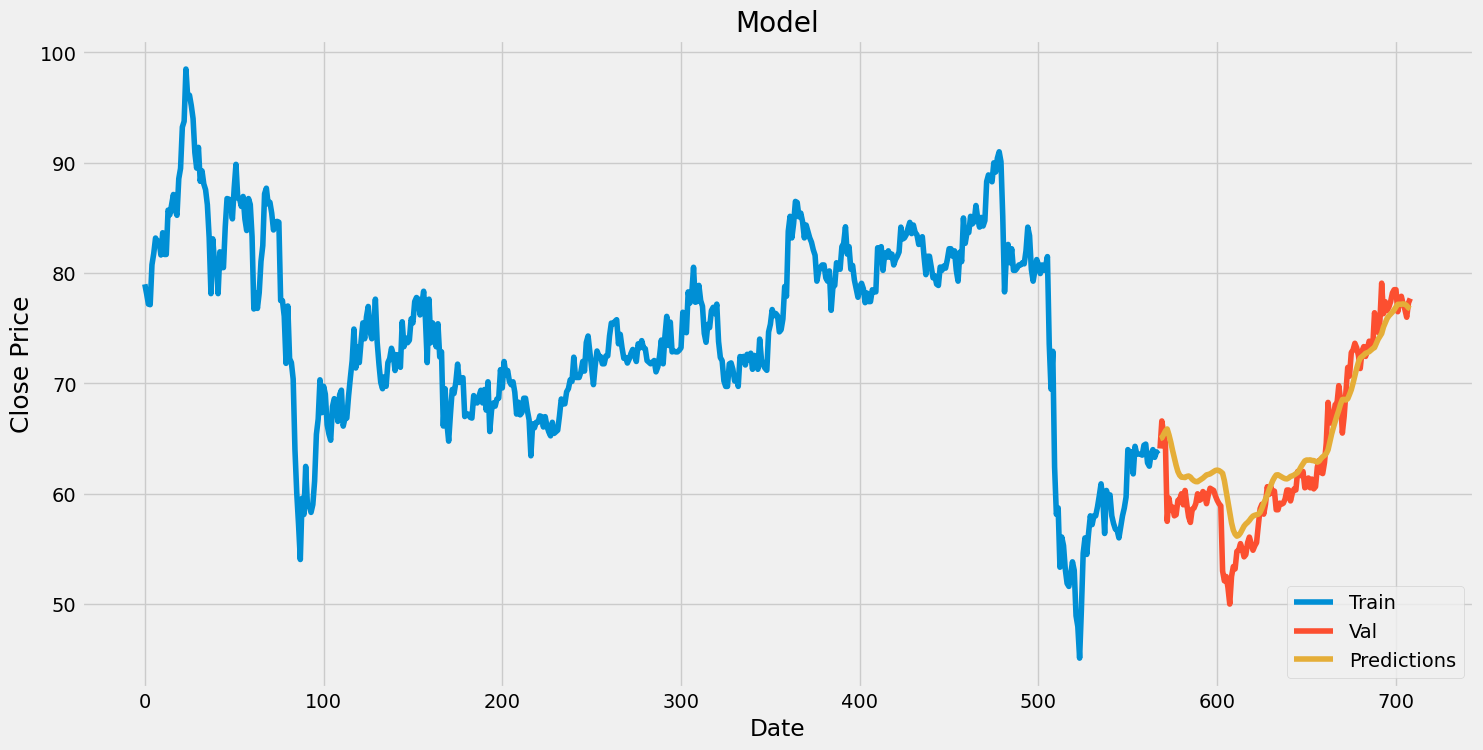

In [171]:

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.legend()
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc= 'lower right')
plt.show()

Dự đoán cổ phiếu VIC

In [138]:
data_vic = pd.read_csv('VIC.csv')

In [139]:
data_vic['Date/Time'] = pd.to_datetime(data_vic['Date/Time']).dt.date

In [140]:
df1 = data_vic.drop_duplicates(subset=["Date/Time"], keep='first')

In [175]:
df1.reset_index(inplace = True, drop = True)
df1.tail()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
543,VIC,2020-12-16,106.8,107.0,106.8,107.0,7610,0
544,VIC,2020-12-17,106.3,106.9,106.0,106.0,21730,0
545,VIC,2020-12-18,104.7,104.7,104.5,104.7,47710,0
546,VIC,2020-12-21,105.5,105.5,105.5,105.5,5360,0
547,VIC,2020-12-22,106.0,106.0,106.0,106.0,13620,0


In [172]:
data1 = df1.filter(['Close'])
last_60_day = data1[-60:].values
last_60_day_scaled = scaler.transform(last_60_day)
X_test = []
X_test.append(last_60_day_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 30ms/step
[[101.24783]]


Gía trị của cổ phiếu VIC:

In [176]:
df1.iloc[[487]]

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
487,VIC,2020-09-29,94.0,94.0,93.0,93.0,8410,0


Tiếp tục với MSN và FPT

MSN:

In [177]:
data_msn = pd.read_csv('MSN.csv')
data_msn['Date/Time'] = pd.to_datetime(data_msn['Date/Time']).dt.date
df2 = data_msn.drop_duplicates(subset=["Date/Time"], keep='first')
df2.reset_index(inplace = True, drop = True)
df2.tail()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
743,MSN,2020-12-16,83.01,83.5,83.01,83.5,6320,0
744,MSN,2020-12-17,83.50,83.5,83.10,83.1,23840,0
745,MSN,2020-12-18,83.70,83.7,83.70,83.7,22800,0
746,MSN,2020-12-21,85.00,85.0,85.00,85.0,12160,0
747,MSN,2020-12-22,83.80,83.8,83.80,83.8,5110,0


In [173]:
data2 = df2.filter(['Close'])
last_60_day1 = data2[-60:].values
last_60_day_scaled1 = scaler.transform(last_60_day1)
X_test = []
X_test.append(last_60_day_scaled1)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price1 = model.predict(X_test)
pred_price1 = scaler.inverse_transform(pred_price1)
print(pred_price1)

1/1 [==============================] - 0s 39ms/step
[[82.68061]]


In [178]:
df2.iloc[[687]]

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
687,MSN,2020-09-29,54.25,54.25,54.15,54.15,12380,0


FPT:

In [179]:
data_fpt = pd.read_csv('FPT.csv')
data_fpt['Date/Time'] = pd.to_datetime(data_fpt['Date/Time']).dt.date
df3 = data_fpt.drop_duplicates(subset=["Date/Time"], keep='first')
df3.reset_index(inplace = True, drop = True)
df3.tail()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
494,FPT,2020-12-16,57.2,57.2,57.2,57.2,32710,0
495,FPT,2020-12-17,56.9,56.9,56.8,56.8,96300,0
496,FPT,2020-12-18,56.5,56.8,56.5,56.8,55320,0
497,FPT,2020-12-21,57.3,57.4,57.3,57.4,38080,0
498,FPT,2020-12-22,57.4,57.4,57.4,57.4,28200,0


In [174]:
data3 = df3.filter(['Close'])
last_60_day2 = data3[-60:].values
last_60_day_scaled2 = scaler.transform(last_60_day2)
X_test = []
X_test.append(last_60_day_scaled2)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price2 = model.predict(X_test)
pred_price2= scaler.inverse_transform(pred_price2)
print(pred_price2)

1/1 [==============================] - 0s 33ms/step
[[59.50421]]


In [180]:
df3.iloc[[438]]

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
438,FPT,2020-09-29,51.4,51.4,51.3,51.4,17960,0
